In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = 1024
system_size = 10

amps_all_basis = np.load("amps_all_basis.npy")
amps_all_basis += np.random.rand(N, system_size)/(1e+9)
log_amps_all_basis = np.log(amps_all_basis)

In [2]:
N = 1024
system_size = 10
p_test = np.ones(N)
for i in range (system_size):
    p_test*= (np.abs(amps_all_basis)**2)[:,i]
    
print(np.sum(p_test))
probs_all_basis = np.abs(amps_all_basis)**2
print(probs_all_basis.shape)

1.0000000511160203
(1024, 10)


In [3]:
print(probs_all_basis[:,0].shape)
print(np.ones(1024))

(1024,)
[1. 1. 1. ... 1. 1. 1.]


In [4]:
p_abc = np.ones((1024))
for i in range (10):
    p_abc*= probs_all_basis[:,i]
log_p_abc = np.log(p_abc)
print(p_abc)
print(p_abc.shape)
print(np.unique(np.sum(np.split(p_abc, 2), axis = 0)).shape)

[8.75967360e-98 6.07651238e-79 1.67178668e-80 ... 3.32114658e-78
 3.93426145e-81 4.41843562e-99]
(1024,)
(512,)


In [5]:

# initialization

p_ab = np.ones((system_size, system_size, N))
log_p_ab = np.ones((system_size, system_size, N))
p_bc = np.ones((system_size, system_size, N))
log_p_bc = np.ones((system_size, system_size, N))
p_b = np.ones((system_size, system_size, N))
log_p_b = np.ones((system_size, system_size, N))



for i in range (1,system_size):
    for j in range (i, system_size):     # i, j is the cut position
        p_ab[i-1, j-1, :2**j] = np.sum(np.split(p_abc, 2**j), axis = 1)
        p_bc[i - 1, j - 1, : int(N/2**i)] = np.sum(np.split(p_abc, 2**i), axis = 0)
   
        if (j == i):
            continue
        else :
            p_b[i - 1, j - 1, : 2**(j-i)] = np.sum(np.split(p_ab[i - 1, j - 1, :2**j], 2**i), axis = 0)
            

In [6]:
N = 1024
system_size = 10
# initialization

p_abc_new = np.ones((system_size, system_size+1, N))
p_ab = np.ones((system_size, system_size, N))
p_bc = np.ones((system_size, system_size, N))
p_b = np.ones((system_size, system_size, N))

cmi = []
for i in range (system_size-1):
    cmi.append(np.array([]))
for x in range (system_size):
    for i in range (x+1,system_size):
        for j in range (i, system_size):     # i, j is the cut position
            for k in range (j+1 ,system_size+1):
                    
                p_abc_new = np.ones((system_size, system_size+1, N))
                p_ab = np.ones((system_size, system_size, N))
                p_bc = np.ones((system_size, system_size, N))
                p_b = np.ones((system_size, system_size, N))
                
                p_abc_new[x, k, :2**(k-x)] = np.sum(np.split(np.sum(np.split(p_abc, 2**k), axis = 1), 2**x) , axis = 0)
                
                p_ab[i-1, j-1, :2**(j-x)] = np.sum(np.split(p_abc_new[x, k, :2**(k-x)], 2**(j-x)), axis = 1)
                
                p_bc[i - 1, j - 1, : int(2**(k-i))] = np.sum(np.split(p_abc_new[x, k, :2**(k-x)], 2**(i-x)), axis = 0)
                if (j == i):
                    pass
                else :
                    p_b[i - 1, j - 1, : 2**(j-i)] = np.sum(np.split(p_ab[i - 1, j - 1, :2**(j-x)], 2**(i-x)), axis = 0)
                cmi[j-i] = np.append(cmi[j-i],(np.sum(-p_ab[i-1, j-1]*np.log(p_ab[i-1, j-1]) -p_bc[i-1, j-1]*np.log(p_bc[i-1, j-1]) \
                                   + p_abc_new[x, k]*np.log(p_abc_new[x,k]) + p_b[i-1, j-1]*np.log(p_b[i-1, j-1]))))
                                            

In [7]:
log_cmi = []
for i in range (system_size-1):
    log_cmi.append(np.array([]))
    log_cmi[i] = np.append(log_cmi[i], np.log(cmi[i]))

log_cmi_data = np.zeros(9)
log_cmi_var = np.zeros(9)
for i in range (len(log_cmi_data)):
    log_cmi_data[i] = np.average(log_cmi[i])
    log_cmi_var[i] = np.std(log_cmi[i])

In [15]:
print(log_cmi)

[array([-4.30591083, -3.8667135 , -3.67929314, -3.57902407, -2.99270061,
       -1.89105077, -1.09028653, -0.64935762, -0.36652318, -4.12461865,
       -3.68304013, -3.48962383, -2.82402616, -1.62893521, -0.78181584,
       -0.31189435, -0.03740091, -4.13852423, -3.69031354, -2.83077752,
       -1.53002887, -0.64931885, -0.1669418 ,  0.09885527, -4.1899834 ,
       -2.90187182, -1.46977524, -0.562898  , -0.07724679,  0.17999102,
       -3.03384727, -1.42409829, -0.4957811 , -0.01180207,  0.23764662,
       -1.58102261, -0.52258115, -0.01389413,  0.24015498, -0.9438443 ,
       -0.23719645,  0.07473187, -0.90669169, -0.35989404, -1.14682791,
       -4.7408501 , -4.31293396, -4.12905865, -3.78524838, -2.8350813 ,
       -2.00290432, -1.49983839, -1.26005511, -4.45394462, -4.01803427,
       -3.51518811, -2.44711043, -1.57403046, -1.06480624, -0.84003948,
       -4.383273  , -3.50624728, -2.26043761, -1.35217613, -0.84741563,
       -0.636186  , -3.65423785, -2.13948716, -1.2010514 , -0.7

In [20]:
log_cmi_data = -log_cmi_data

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


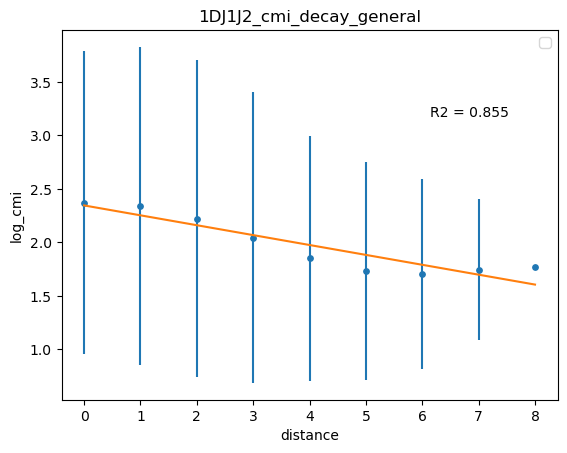

In [21]:

a, b = np.polyfit(np.arange(system_size-1), log_cmi_data, 1)
r2 = 1 - np.sum((a*np.arange(system_size-1)+b*np.ones(system_size-1)-log_cmi_data)**2) \
/np.sum((log_cmi_data - np.sum(log_cmi_data)/(system_size-1))**2) 
ls = 'dotted'

plt.scatter(np.arange(system_size-1), log_cmi_data, s = 15 )
plt.errorbar(np.arange(system_size-1), log_cmi_data, yerr = log_cmi_var, linestyle='None')
plt.plot(np.arange(system_size-1), a*np.arange(system_size-1)+b*np.ones(system_size-1))


plt.xlabel("distance")
plt.ylabel("log_cmi")
plt.figtext(0.7,0.7,'R2 = ' + str(np.round(r2,3)))
plt.title("1DJ1J2_cmi_decay_general")
plt.legend()
plt.savefig("1DJ1J2_cmi_decay_general.png", dpi = 200)

In [22]:
cmi = np.zeros((system_size, system_size))  # conditional mutual information
print(p_ab.shape)
print(p_bc.shape)
print(p_abc.shape)
for i in range (0, system_size-1):
    for j in range (i , system_size-1):
        cmi[i, j] = np.sum(-p_ab[i, j]*np.log(p_ab[i, j]) -p_bc[i, j]*np.log(p_bc[i, j]) + p_abc*log_p_abc + p_b[i, j]*np.log(p_b[i, j]))
cmi = cmi[:-1,:-1]

(10, 10, 1024)
(10, 10, 1024)
(1024,)


In [24]:
cmi = -cmi

In [25]:

cmi_distance = np.zeros(system_size-1)

for i in range(0, system_size-1):
    for j in range(i, system_size-1):
        cmi_distance[j - i] += cmi[i, j]/(system_size-(j-i)-1)
print(cmi_distance)
print(np.log(cmi_distance[-1]))

[4.61125418 4.7037859  4.7037859  4.7037859  4.7037859  4.7037859
 4.7037859  4.7037859  4.7037859 ]
1.548367695531266


In [26]:

a, b = np.polyfit(np.arange(system_size-1), np.log(cmi_distance), 1)
r2 = 1 - np.sum((a*np.arange(system_size-1)+b*np.ones(system_size-1)-np.log(cmi_distance))**2) \
/np.sum((np.log(cmi_distance) - np.sum(np.log(cmi_distance))/(system_size-1))**2)
r2

0.3000000000000097

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


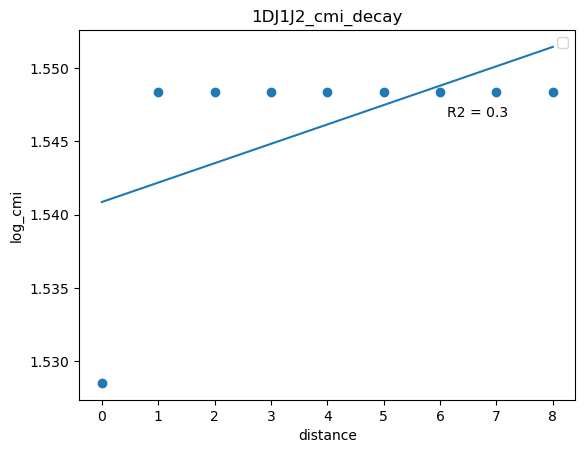

In [27]:

plt.scatter(np.arange(system_size-1), np.log(cmi_distance))
plt.plot(np.arange(system_size-1), a*np.arange(system_size-1)+b*np.ones(system_size-1))
plt.xlabel("distance")
plt.ylabel("log_cmi")
plt.figtext(0.7,0.7,'R2 = ' + str(np.round(r2,3)))
plt.title("1DJ1J2_cmi_decay")
plt.legend()
plt.savefig("1DJ1J2_cmi_decay.png", dpi = 200)

In [28]:
cmi

array([[ 4.7037859,  4.7037859,  4.7037859,  4.7037859,  4.7037859,
         4.7037859,  4.7037859,  4.7037859,  4.7037859],
       [-0.       ,  4.7037859,  4.7037859,  4.7037859,  4.7037859,
         4.7037859,  4.7037859,  4.7037859,  4.7037859],
       [-0.       , -0.       ,  4.7037859,  4.7037859,  4.7037859,
         4.7037859,  4.7037859,  4.7037859,  4.7037859],
       [-0.       , -0.       , -0.       ,  4.7037859,  4.7037859,
         4.7037859,  4.7037859,  4.7037859,  4.7037859],
       [-0.       , -0.       , -0.       , -0.       ,  4.7037859,
         4.7037859,  4.7037859,  4.7037859,  4.7037859],
       [-0.       , -0.       , -0.       , -0.       , -0.       ,
         4.7037859,  4.7037859,  4.7037859,  4.7037859],
       [-0.       , -0.       , -0.       , -0.       , -0.       ,
        -0.       ,  4.7037859,  4.7037859,  4.7037859],
       [-0.       , -0.       , -0.       , -0.       , -0.       ,
        -0.       , -0.       ,  4.7037859,  4.7037859],


In [200]:
a = np.array([1, 3, 2, 2,1,3,4])
auni = np.unique(a , return_index= True)
print(a[auni[1]])
auni[1]
a[np.sort(auni[1])]

[1 2 3 4]


array([1, 3, 2, 4])

In [6]:
np.array([[0,1,2,3], [2,3,4]])

array([list([0, 1, 2, 3]), list([2, 3, 4])], dtype=object)

In [1]:
import numpy as np

In [9]:
N = 4
basis=[]
for i in range(2**N):
    basis_temp = np.zeros((N))
    a = np.array([int(d) for d in bin(i)[2:]])
    print(a)
    l = len(a)
    basis_temp[N-l:] = a

    basis.append(basis_temp)

[0]
[1]
[1 0]
[1 1]
[1 0 0]
[1 0 1]
[1 1 0]
[1 1 1]
[1 0 0 0]
[1 0 0 1]
[1 0 1 0]
[1 0 1 1]
[1 1 0 0]
[1 1 0 1]
[1 1 1 0]
[1 1 1 1]


In [6]:
np.array([int(d) for d in bin(i)[2:]])

array([1, 1, 1, 1])

In [14]:
import itertools
np.array(list(itertools.product([0, 1], repeat=3)))

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [23]:
ini = np.random.normal(size=10)
print(ini)
fft_ini = np.fft.rfft(ini)
print(fft_ini)
end = np.fft.irfft(fft_ini)
print(end)

[-1.19741194  0.78247467  0.36009986 -0.15407292 -0.09541611 -0.89117249
  0.28013096 -1.04501972  0.22750229 -1.47650747]
[-3.20939287+0.j         -0.46504217-2.0805039j  -1.75126614-2.05983967j
 -1.48015795-1.18962891j -1.86549851-2.2697704j   2.35920298+0.j        ]
[-1.19741194  0.78247467  0.36009986 -0.15407292 -0.09541611 -0.89117249
  0.28013096 -1.04501972  0.22750229 -1.47650747]


In [22]:
ini_copy = np.copy(ini)
ini_2 = np.zeros((10))
for i in range (10):
    ini_2[i] = ini_copy[i-1]
print(ini_2)
print(np.cos(np.fft.fft(ini_2)))

[ 0.00711117 -1.63324506 -0.92383365 -1.56931322  1.38355142 -0.51416267
  1.37078223  0.28460925  0.37246539  0.15567392]
[-1.06636122+0.00000000e+00j -2.67579586+4.04003335e+00j
  1.37290345+1.38574443e+00j  1.23572328-1.62434916e-01j
 -2.10735158+1.58933714e+00j  5.48651433+4.44089210e-16j
 -2.10735158-1.58933714e+00j  1.23572328+1.62434916e-01j
  1.37290345-1.38574443e+00j -2.67579586-4.04003335e+00j]
